<a href="https://colab.research.google.com/github/Veerendravikas04/OnlineFraud_Detection/blob/main/Online_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [ ]:
Online_Fraud=pd.read_csv('/content/drive/MyDrive/Dataset/fraud1.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Dataset/fraud1.csv'

In [ ]:
online_fraud = pd.DataFrame(Online_Fraud)

In [ ]:
print(online_fraud.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225            

In [ ]:
online_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
online_fraud.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
online_fraud['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
online_fraud.replace(to_replace=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], value=[2, 4, 1, 5, 3], inplace=True)


In [ ]:
online_fraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,4,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,5,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,4,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,4,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,4,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,4,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,4,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,3,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
online_fraud['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
legit = online_fraud[online_fraud['isFraud'] == 0]
fraud = online_fraud[online_fraud['isFraud'] == 1]
print("The legit people:")
lgc=legit['isFraud'].value_counts()
print(lgc)
print("\nThe Fraud people:")
frc=fraud['isFraud'].value_counts()
print(frc)

The legit people:
0    6354407
Name: isFraud, dtype: int64

The Fraud people:
1    8213
Name: isFraud, dtype: int64


Imbalanced data here

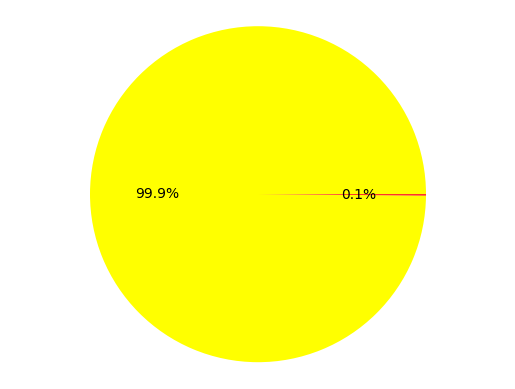

In [ ]:
sizes = [lgc[0], frc[1]]
colors = ['yellow', 'red']
plt.pie(sizes, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
online_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,4,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,5,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,4,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
x=online_fraud[['type','amount','oldbalanceOrg','newbalanceOrig']]
y=online_fraud[['isFraud']]
z=online_fraud[['type','amount','oldbalanceOrg','newbalanceOrig','isFraud']]

In [ ]:
print("Required coloum:")
print(x.head(10))
print("\ny (isFraud column):")
print(y.head(10))

Required coloum:
   type    amount  oldbalanceOrg  newbalanceOrig
0     4   9839.64      170136.00       160296.36
1     4   1864.28       21249.00        19384.72
2     5    181.00         181.00            0.00
3     2    181.00         181.00            0.00
4     4  11668.14       41554.00        29885.86
5     4   7817.71       53860.00        46042.29
6     4   7107.77      183195.00       176087.23
7     4   7861.64      176087.23       168225.59
8     4   4024.36        2671.00            0.00
9     3   5337.77       41720.00        36382.23

y (isFraud column):
   isFraud
0        0
1        0
2        1
3        1
4        0
5        0
6        0
7        0
8        0
9        0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y,random_state=2)

In [ ]:
print("X shape",x.shape)
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y shape",y.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X shape (6362620, 4)
X_train shape: (5090096, 4)
X_test shape: (1272524, 4)
y shape (6362620, 1)
y_train shape: (5090096, 1)
y_test shape: (1272524, 1)


In [ ]:
model=DecisionTreeClassifier()

In [ ]:

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
x_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_prediction, y_test)
print("This is the testing accuracy:",testing_data_accuracy)

This is the testing accuracy: 0.9997053100766665


In [ ]:
x_prediction = model.predict(x_train)
testing_data_accuracy = accuracy_score(x_prediction, y_train)
print("This is the training accuracy:",testing_data_accuracy)

This is the training accuracy: 1.0


In [ ]:
online_fraud_columns = x.columns
print("Column names:", online_fraud_columns)

Column names: Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'], dtype='object')


In [ ]:
column_name= ['type', 'amount','oldbalanceOrg', 'newbalanceOrig']
print("Give the input for model based on this data")
print(column_name)

Give the input for model based on this data
['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']


In [ ]:
print(x.head())

   type    amount  oldbalanceOrg  newbalanceOrig
0     4   9839.64       170136.0       160296.36
1     4   1864.28        21249.0        19384.72
2     5    181.00          181.0            0.00
3     2    181.00          181.0            0.00
4     4  11668.14        41554.0        29885.86


In [ ]:
input = [4	,11668.14,	41554.00,	29885.86]
input_data = np.array(input).reshape(1, -1)
prediction = model.predict(input_data)
if prediction == 1:
    print("The transaction is a fraudulent transaction:", prediction)
else:
    print("This is a legitimate transaction:", prediction)


This is a legitimate transaction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
z.head(10)

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,4,9839.64,170136.00,160296.36,0
1,4,1864.28,21249.00,19384.72,0
2,5,181.00,181.00,0.00,1
3,2,181.00,181.00,0.00,1
4,4,11668.14,41554.00,29885.86,0
5,4,7817.71,53860.00,46042.29,0
6,4,7107.77,183195.00,176087.23,0
7,4,7861.64,176087.23,168225.59,0
8,4,4024.36,2671.00,0.00,0
9,3,5337.77,41720.00,36382.23,0
